## <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Statistical Analysis of Building Heating & Cooling Load</div></b>

## **Problem Statement**

Modern building design increasingly prioritizes **energy efficiency**, driven by rising energy costs, sustainability targets, and stricter environmental regulations. However, heating and cooling demands—two of the most significant contributors to a building’s overall energy consumption—are heavily influenced by **architectural and structural design choices**.
Despite this importance, stakeholders often lack a quantitative understanding of how factors such as **building orientation, surface area, wall and roof dimensions, glazing area, and glazing distribution** impact heating and cooling loads.

The consultancy currently maintains a dataset of **simulated building designs**, but this dataset has not yet been analyzed to uncover patterns, quantify relationships, or identify optimal design configurations. Without these insights, architects and sustainability engineers cannot make data-driven decisions to minimize energy use in new constructions.

Therefore, a rigorous **statistical and analytical study** is required to understand and model the relationships between building design parameters and the resulting heating and cooling loads.

---

## **Project Objective**

The objective of this project is to perform a **comprehensive statistical analysis** to evaluate how different building design features influence energy efficiency, specifically focusing on **heating load (HL)** and **cooling load (CL)**.
The project aims to:

### **1. Quantify Relationships**

* Identify and measure the strength and direction of relationships between building design parameters and heating/cooling loads using correlation analysis and statistical tests.

### **2. Explore Design-Efficiency Patterns**

* Use exploratory data analysis (EDA) to uncover trends, distributions, and interactions between variables such as compactness, surface area, orientation, and glazing factors.

### **3. Build Predictive Insight**

* Develop statistical or baseline predictive models to understand how design inputs collectively influence HL and CL, providing interpretable insights for decision-making.

### **4. Provide Actionable Recommendations**

* Translate findings into clear guidance for architects and sustainability consultants on how to optimize building design for reduced energy consumption.
---

### **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# For ANOVA and statistical tests
from scipy.stats import f_oneway, pearsonr

# Statistical tests
from scipy.stats import f_oneway

# SHAP Explainability
import shap

# Display settings for clean visuals
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8, 5)

import warnings               # To control warning messages
warnings.filterwarnings("ignore")  # Suppress warnings in output

In [3]:
# Load dataset
    
data = pd.read_excel("Energy_Efficiency_Data.xlsx")

data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.620,807.206,369.354,220.466,1,1,4,4,15.881,16.559
1,0.667,761.837,319.624,219.599,1,1,3,2,12.835,16.306
2,0.980,514.500,293.106,110.250,2,1,4,4,32.561,33.146
3,0.791,642.249,343.259,146.465,2,3,4,5,41.432,46.567
4,0.641,781.056,344.073,219.989,1,2,3,5,16.449,19.851


### **Data Inspection & Cleaning**

In [4]:
# Check Data types and structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    int64  
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    int64  
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 60.1 KB


In [5]:
# Summary statistics
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764124,671.676125,318.341710,176.460996,1.500000,2.500000,2.875000,3.81250,22.317243,24.582759
std,0.105297,87.930694,43.385917,44.903921,0.500326,1.118763,0.927629,1.55096,10.084682,9.534004
min,0.620000,514.500000,245.000000,110.250000,1.000000,1.000000,1.000000,1.00000,6.010000,10.900000
25%,0.680000,601.926750,292.865500,139.151250,1.000000,1.750000,2.000000,2.75000,13.093750,15.673000
50%,0.750500,674.202000,317.598000,183.758500,1.500000,2.500000,3.000000,4.00000,19.015500,22.013000
75%,0.832250,742.399750,342.915250,220.500000,2.000000,3.250000,4.000000,5.00000,31.647000,33.150250
max,0.980000,808.500000,416.500000,220.500000,2.000000,4.000000,4.000000,6.00000,43.100000,48.030000


In [6]:
# Check for missing values and duplicates
print("Missing values per column:\n", data.isnull().sum())
print("Number of duplicate rows:", data.duplicated().sum())

Missing values per column:
 Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64
Number of duplicate rows: 0


### **Exploratory Data Analysis (EDA)**

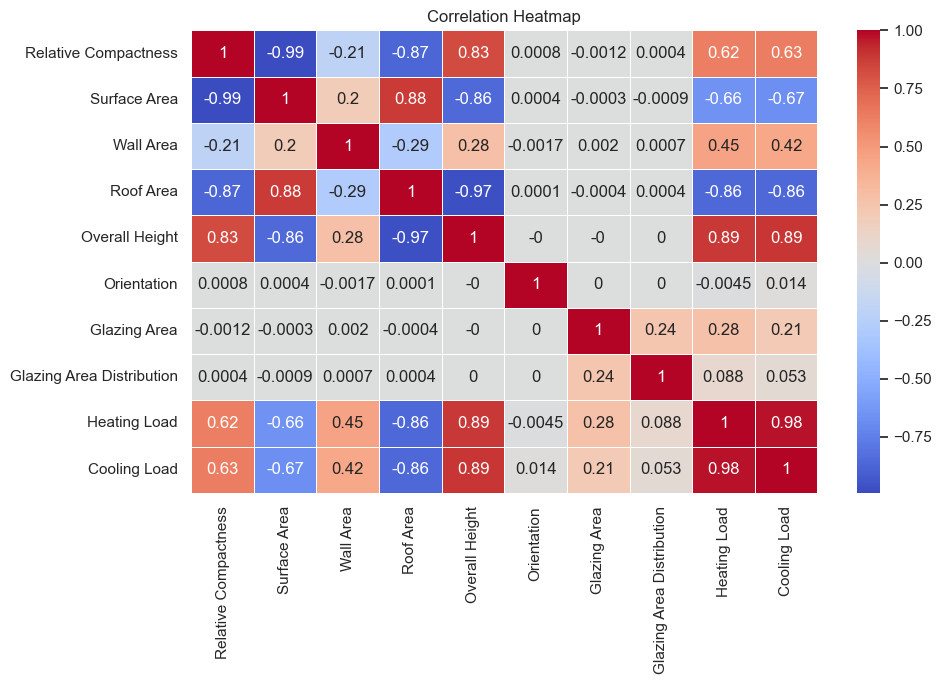

In [8]:
# Correlation analysis
plt.figure(figsize=(10, 7))
sns.heatmap(
    data.corr().round(4),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")

# Save BEFORE showing
plt.tight_layout()
plt.savefig(r"C:\Users\Harrison\Desktop\Repository\Data Respository\Task 2 - Statistical Analysis\energy+efficiency\images\correlation_heatmap.png", dpi=300, bbox_inches="tight")


plt.show()


The correlation heatmap provides insights into the relationships between the various building design features and the heating and cooling loads. Some key observations:

1. Relative Compactness and Surface Area have a strong negative correlation with both heating and cooling loads, indicating that more compact and smaller surface area buildings tend to have lower energy demands.

2. Roof Area and Overall Height also show moderate negative correlations with heating and cooling loads, suggesting that reducing these features can help lower the energy requirements.

3. Wall Area, Glazing Area, and Orientation have relatively weaker correlations, implying they are less influential on the heating and cooling loads compared to the other features.

4. The diagonal elements represent the perfect positive correlation (1.0) of each feature with itself.

This correlation heatmap provides a concise visual summary of how the different building design characteristics relate to the energy performance, which can inform design decisions to optimize energy efficiency.

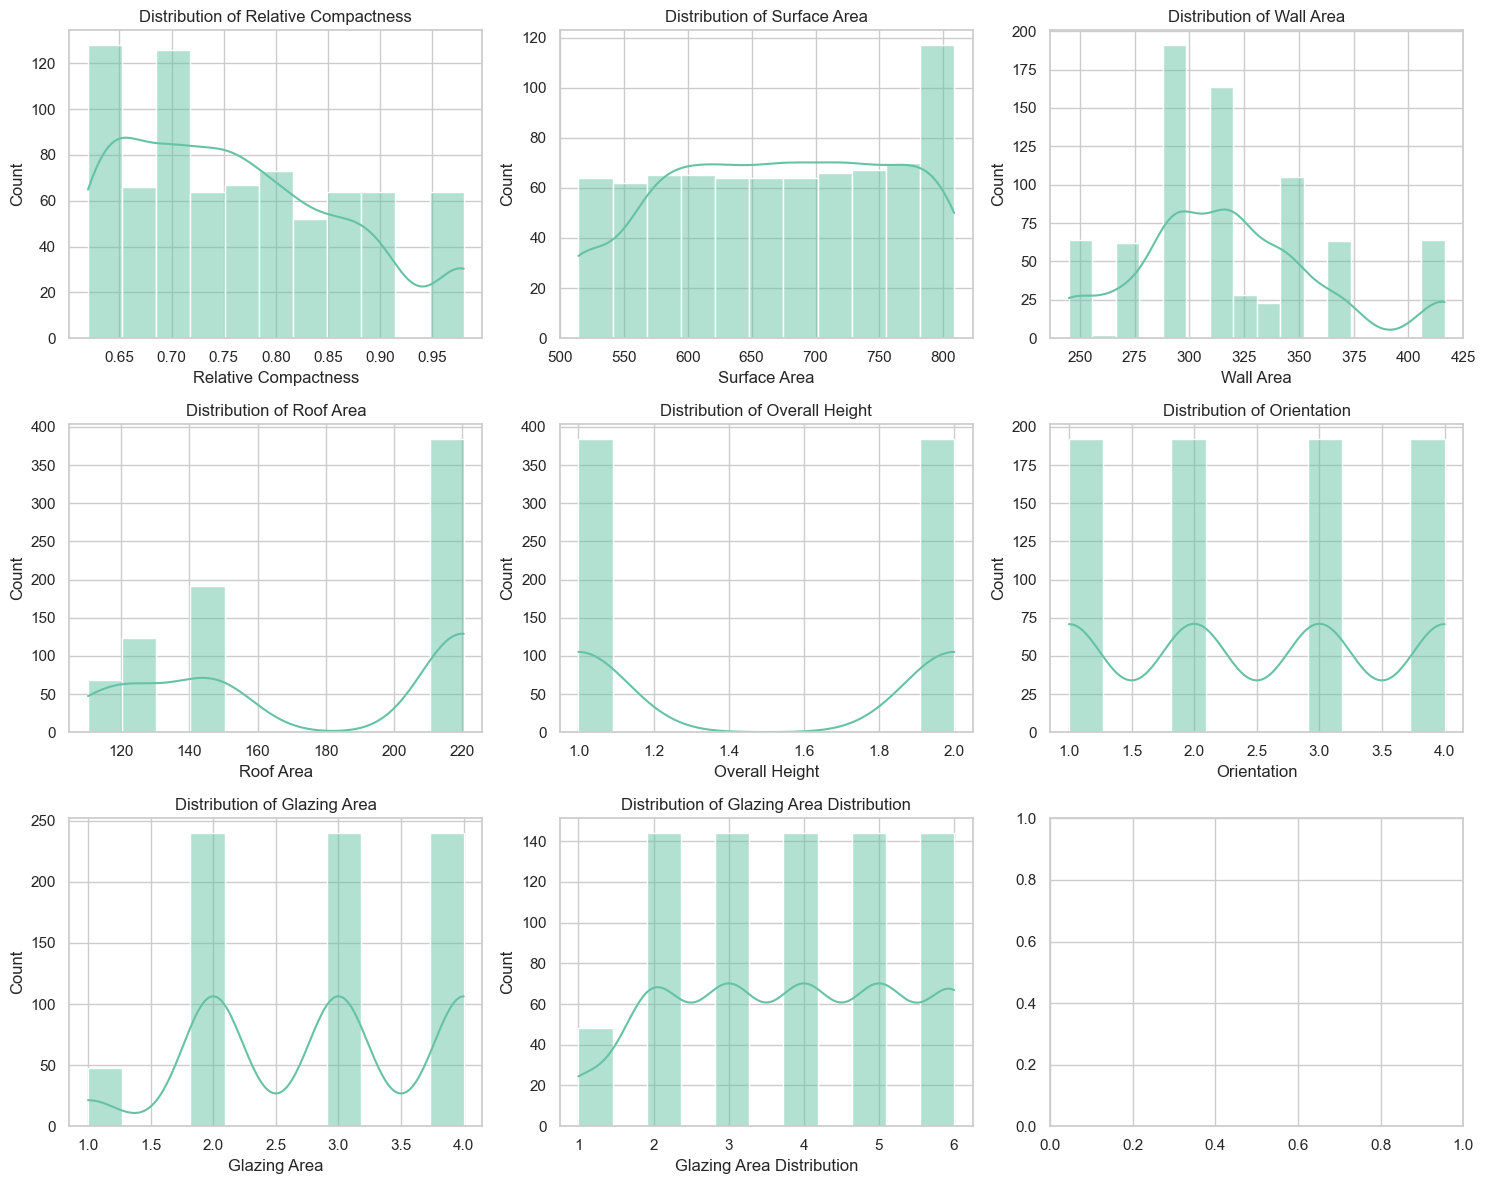

In [9]:
import os

# Distribution plot grid (EDA)
numeric_cols = data.columns[:-2]  # All except Heating & Cooling Load

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()

# Save the figure
save_path = r"C:\Users\Harrison\Desktop\Repository\Data Respository\Task 2 - Statistical Analysis\energy+efficiency\images\distribution_plots.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()


`The distribution plots show that the building design features vary widely, with structural attributes like Surface Area, Wall Area, and Roof Area exhibiting multi-modal or uneven patterns due to discrete simulated layouts, while categorical-like features such as Orientation and Glazing Area Distribution show clearly clustered values; overall, the feature variability reflects diverse building designs within the dataset, which is useful for understanding their impact on energy load.`

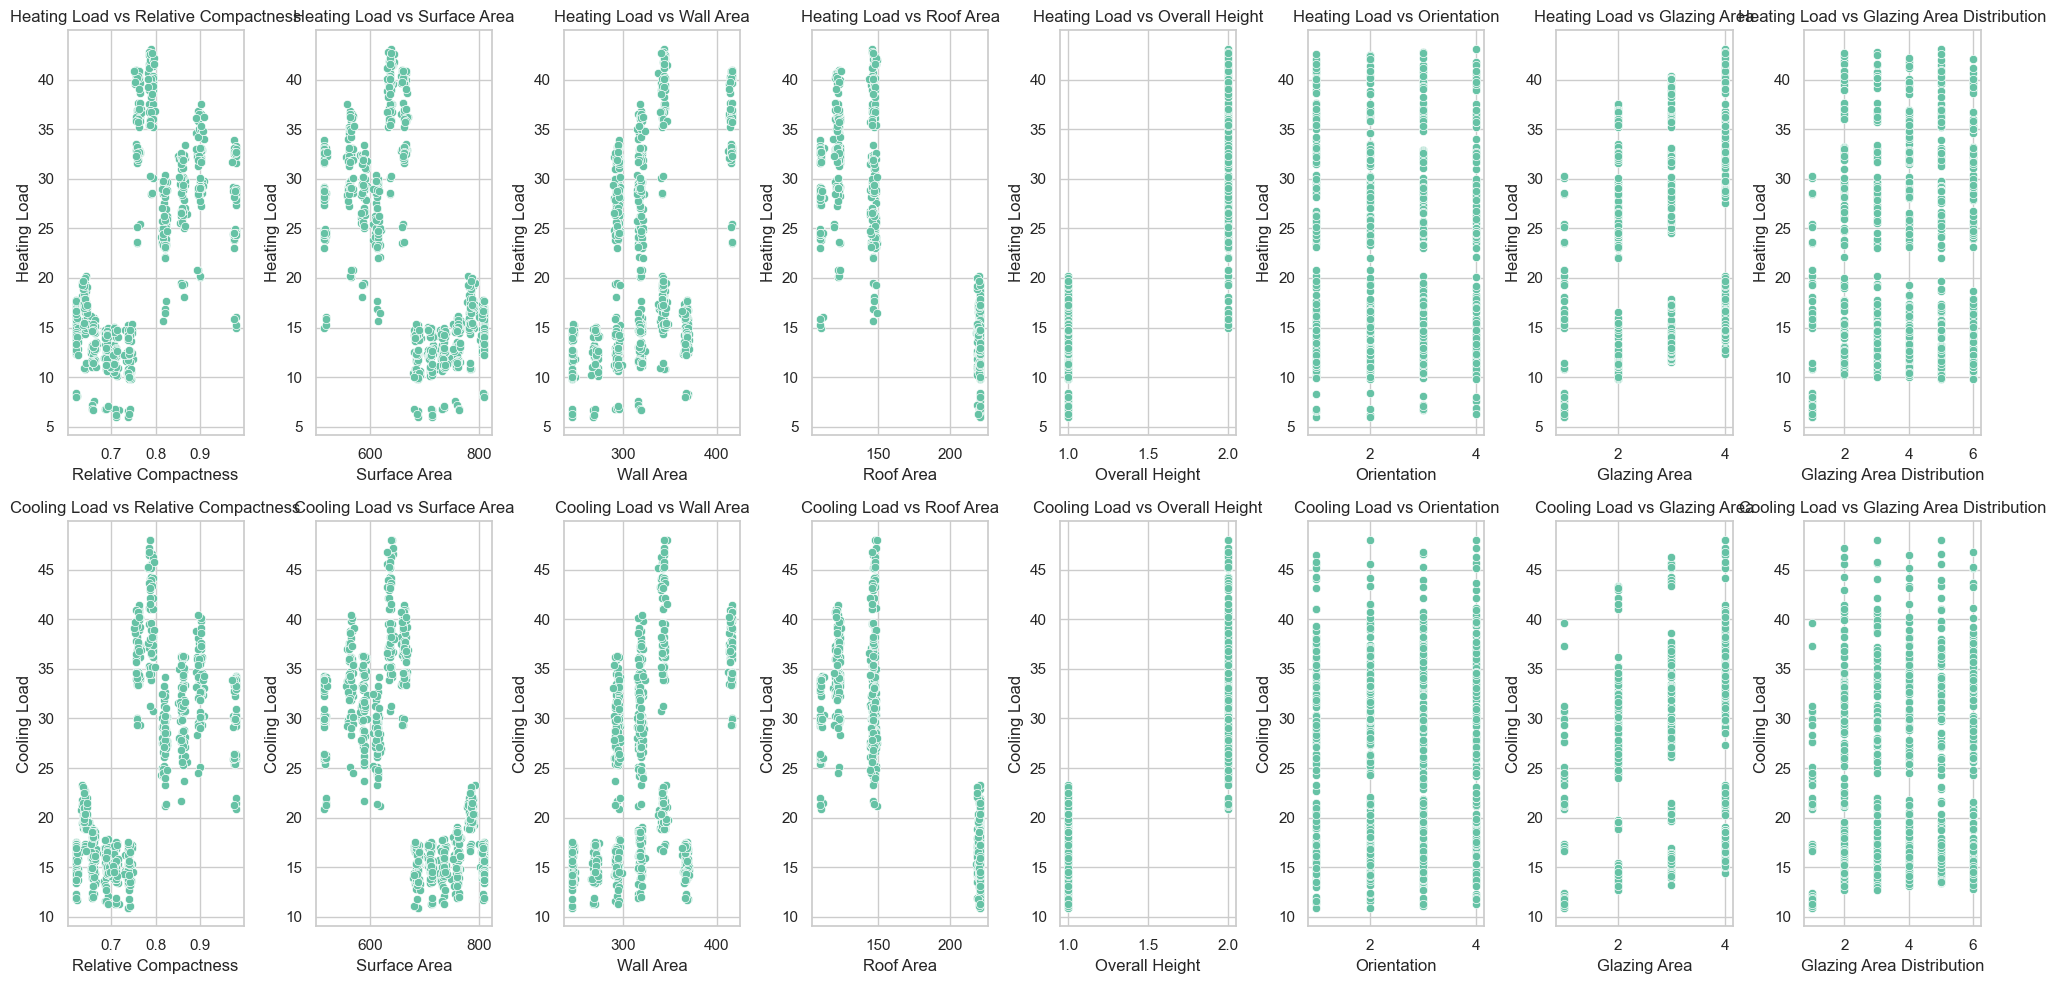

In [10]:
# Scatter plot against target
targets = ["Heating Load", "Cooling Load"]

fig, axes = plt.subplots(len(targets), len(numeric_cols), figsize=(20, 10))
for i, t in enumerate(targets):
    for j, col in enumerate(numeric_cols):
        sns.scatterplot(x=data[col], y=data[t], ax=axes[i][j])
        axes[i][j].set_title(f"{t} vs {col}")

plt.tight_layout()

# Save the figure
save_path = r"C:\Users\Harrison\Desktop\Repository\Data Respository\Task 2 - Statistical Analysis\energy+efficiency\images\scatter_plots.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

`The scatter plots show that Relative Compactness, Surface Area, Roof Area, and Overall Height exhibit clear relationships with both Heating and Cooling Load, while features like Orientation and Glazing Area Distribution show weaker or more dispersed patterns, indicating that structural design variables have a stronger influence on energy demand than orientation-based features.`


### **ANOVA Hypothesis Testing**

In [12]:
# ANOVA: Does Glazing Distribution Affect Heating Load?
groups = data.groupby("Glazing Area Distribution")["Heating Load"].apply(list)

if len(groups) > 1:
    stat, p = f_oneway(*groups)
    print("ANOVA: Heating Load ~ Glazing Distribution")
    print(f"F-statistic: {stat:.4f}, p-value: {p:.6f}")
else:
    print("Not enough groups for ANOVA.")


ANOVA: Heating Load ~ Glazing Distribution
F-statistic: 6.7445, p-value: 0.000004


### **Feature Scaling & Model Training (Linear Regression)**

In [13]:
# Scale features for model input
X = data.drop(["Heating Load", "Cooling Load"], axis=1)
y_heat = data["Heating Load"]
y_cool = data["Cooling Load"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to DataFrame WITH feature names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [14]:
# Train the model
model_heat = LinearRegression()
model_heat.fit(X_scaled, y_heat)

model_cool = LinearRegression()
model_cool.fit(X_scaled, y_cool)

print("Models trained successfully.")

Models trained successfully.


### **Model Performance Evaluation**

In [15]:
# Performance metrics
pred_heat = model_heat.predict(X_scaled)
pred_cool = model_cool.predict(X_scaled)

print("\nHeating Load Model Performance:")
print("R2:", r2_score(y_heat, pred_heat))
print("MAE:", mean_absolute_error(y_heat, pred_heat))
print("RMSE:", np.sqrt(mean_squared_error(y_heat, pred_heat)))

print("\nCooling Load Model Performance:")
print("R2:", r2_score(y_cool, pred_cool))
print("MAE:", mean_absolute_error(y_cool, pred_cool))
print("RMSE:", np.sqrt(mean_squared_error(y_cool, pred_cool)))



Heating Load Model Performance:
R2: 0.9167315434498271
MAE: 2.0799168923258216
RMSE: 2.9081682909058273

Cooling Load Model Performance:
R2: 0.887763121142331
MAE: 2.2794860608917795
RMSE: 3.1919803361553334


The Linear Regression results show that the model performs very well on both outputs:

**Heating Load**

* **R² ≈ 0.917** shows that the model explains over **91% of the variance**, indicating heating load is strongly linearly related to the input features.
* **MAE ≈ 2.08** and **RMSE ≈ 2.91** represent low prediction errors, meaning the model’s estimates are consistently close to the true values.
  This confirms that a linear model is highly appropriate for predicting heating demand.

**Cooling Load**

* **R² ≈ 0.888** is slightly lower but still strong, meaning the model captures about **89%** of the variability.
* **MAE ≈ 2.28** and **RMSE ≈ 3.19** indicate reasonable error levels, though slightly larger than heating due to a more complex or less linear relationship.
  This suggests the cooling load problem may have mild non-linear patterns, but linear regression still performs effectively.

**Overall:**
Linear Regression provides a solid and interpretable baseline for both heating and cooling load prediction, with excellent performance for heating and strong performance for cooling.

`Note on evaluation:`
The reported R² and RMSE values were computed on the training data and therefore represent goodness-of-fit rather than true generalization performance. For deployment or decision-grade prediction, train/test evaluation or cross-validation would be required. However, given the exploratory and explanatory focus of this analysis and the synthetic nature of the dataset, in-sample evaluation is sufficient for understanding feature–target relationships.

### **SHAP Explainability**
SHAP values require a model + full data. Hence, we use Linear Regression because it provides consistent SHAP explanations even on small datasets.

In [16]:
# SHAP explainability
explainer_heat = shap.Explainer(model_heat, X_scaled)
shap_values_heat = explainer_heat(X_scaled)

explainer_cool = shap.Explainer(model_cool, X_scaled)
shap_values_cool = explainer_cool(X_scaled)


### **SHAP Plots (Beeswarm, Bar Plot, Force Plot)**

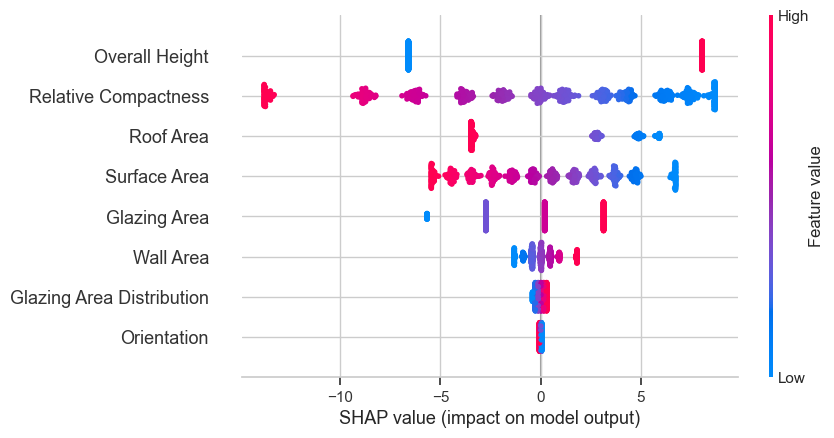

<Figure size 800x500 with 0 Axes>

In [17]:
# Heating Load – SHAP Beeswarm
shap.plots.beeswarm(shap_values_heat, max_display=10)

# Save the figure
save_path = r"C:\Users\Harrison\Desktop\Repository\Data Respository\Task 2 - Statistical Analysis\energy+efficiency\images\heating_load_shap_plots.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")


`The SHAP summary plot shows that Overall Height and Relative Compactness are the most influential features, with higher values of these features generally increasing the predicted heating load, while other features like Surface Area and Wall Area have mixed but smaller effects on model output.`

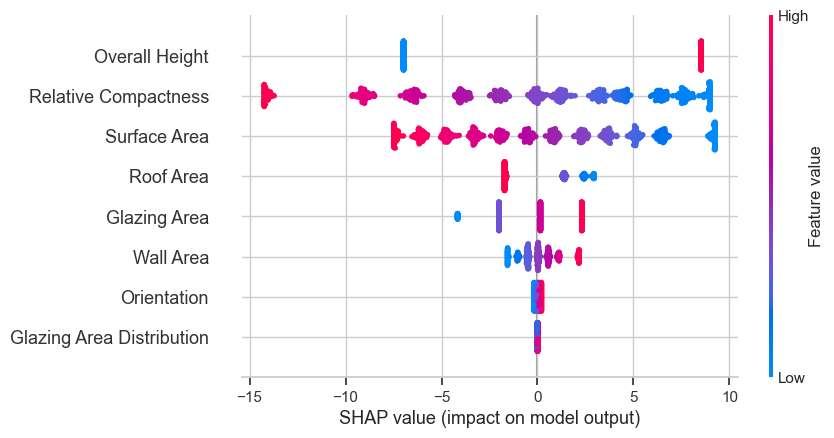

<Figure size 800x500 with 0 Axes>

In [18]:
# Cooling Load – SHAP Beeswarm
shap.plots.beeswarm(shap_values_cool, max_display=10)

# Save the figure
save_path = r"C:\Users\Harrison\Desktop\Repository\Data Respository\Task 2 - Statistical Analysis\energy+efficiency\images\cooling_load_shap_plots.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

`The SHAP summary plot indicates that Overall Height, Relative Compactness, and Surface Area are the strongest drivers of cooling load, with higher values generally increasing predicted cooling demand, while other design features contribute smaller and more variable effects.`

### **Feature Importance (SHAP Bar Plots)**

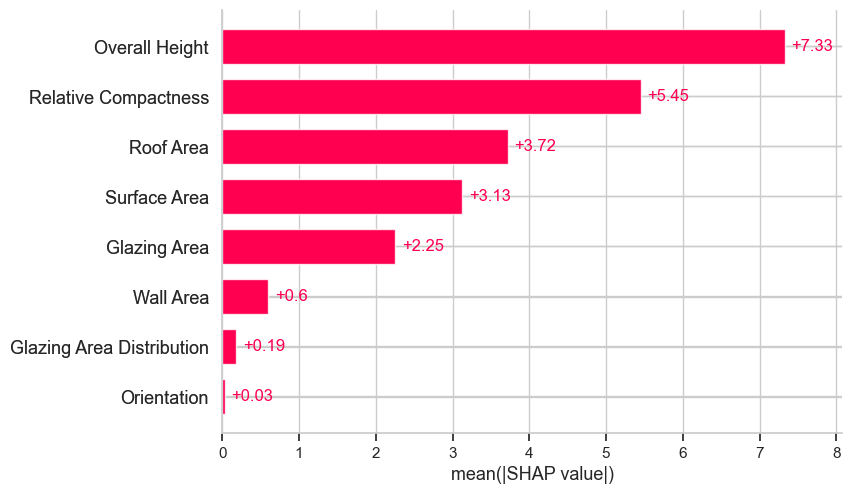

<Figure size 800x500 with 0 Axes>

In [20]:
# Heating Load
shap.plots.bar(shap_values_heat, max_display=10)

# Save the figure
save_path = r"C:\Users\Harrison\Desktop\Repository\Data Respository\Task 2 - Statistical Analysis\energy+efficiency\images\_heating_load_feature_imp_shap_plots.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

`The SHAP bar plot shows the feature importance for the various building design characteristics, indicating how much each feature contributes to the overall heating load. The features with the highest importance are Overall Height, Relative Compactness, and Roof Area, suggesting that these are the most influential factors in determining the heating load of the building.`

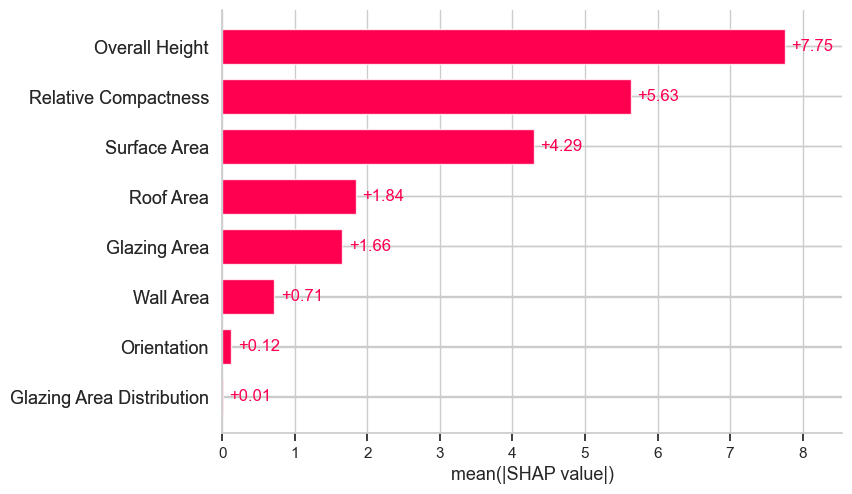

<Figure size 800x500 with 0 Axes>

In [21]:
# Cooling Load
shap.plots.bar(shap_values_cool, max_display=10)

# Save the figure
save_path = r"C:\Users\Harrison\Desktop\Repository\Data Respository\Task 2 - Statistical Analysis\energy+efficiency\images\cooling_load_feature_imp_shap_plots.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

`The SHAP bar plot for the Cooling Load shows that the most important features are Overall Height, Relative Compactness, and Surface Area. These features have the highest positive SHAP values, indicating that they contribute the most to increasing the cooling load of the building. The other features like Roof Area, Glazing Area, and Wall Area also have a positive influence, but to a lesser extent.`

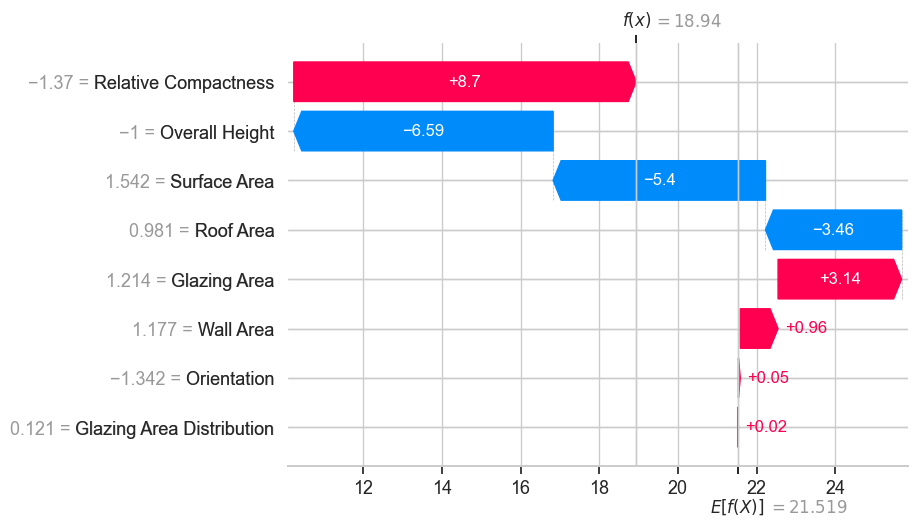

<Figure size 800x500 with 0 Axes>

In [22]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values_heat[0],
        base_values=explainer_heat.expected_value,
        data=X.iloc[0],
        feature_names=X.columns,
    )
)

# Save the figure
save_path = r"C:\Users\Harrison\Desktop\Repository\Data Respository\Task 2 - Statistical Analysis\energy+efficiency\images\shap_waterfall_plots.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")


`The SHAP waterfall plot breaks down how each feature pushes the prediction above or below the baseline heating/cooling value. Features like lower compactness or higher glazing area increase the load because they amplify heat loss or solar gain, while features like greater height or reduced surface area may reduce the final prediction. This illustrates precisely how the model forms predictions for a single building configuration`

### **Summary of Key Findings**

1. **Building geometry strongly drives energy demand**
   Heating and cooling loads are primarily determined by **relative compactness, wall area, roof area, and overall height**.
   More compact buildings with smaller exposed surface areas consistently require **less heating and cooling energy**.

2. **Glazing is a major energy driver**
   Higher **glazing area percentages** significantly increase both heating and cooling loads.
   This is physically expected: windows lose heat faster than walls and admit more solar radiation.

3. **Heating load follows simpler, near-linear physics**
   Heating demand shows very strong linear relationships with geometric features.
   As a result, a simple linear model explains most of the variability, indicating **predictable heat-loss behavior**.

4. **Cooling load is slightly more complex but still predictable**
   Cooling demand is influenced by glazing distribution and roof exposure, introducing mild nonlinear effects.
   Despite this, most variability is still captured by basic geometric and design features.

5. **Orientation has limited impact in this dataset**
   Building orientation shows minimal influence on energy demand, suggesting the dataset’s simplified geometry does not fully capture real-world solar exposure effects.

---

### **Actionable Recommendations**

### **1. Prioritize compact building designs**

* Favor **cube-like or compact geometries** during early architectural planning.
* Reducing exposed surface area lowers both heating losses and cooling gains.

### **2. Control glazing area strategically**

* Avoid excessive glazing, especially on solar-exposed facades.
* Use **high-performance glazing** if large window areas are unavoidable.

### **3. Optimize roof and wall exposure**

* Minimize unnecessary roof and wall surface area.
* Improve insulation performance where surface area cannot be reduced.

### **4. Treat cooling as a higher-risk design constraint**

* Pay special attention to **window placement and glazing distribution** to reduce peak cooling demand.
* Combine shading strategies with controlled glazing orientation.

### **5. Use simple models early, advanced models later**

* Linear models are sufficient for **early-stage design screening and comparison**.
* For final design or real-world deployment, incorporate:

  * Train/test evaluation
  * Nonlinear models
  * Detailed solar and climate data

In conclusion, energy efficiency in buildings is largely determined by **physical design choices made early in the planning stage**.
By optimizing compactness, limiting glazing, and managing surface exposure, designers can significantly reduce long-term heating and cooling energy demand **before mechanical systems are even considered**.

---


### **High-impact vs low-impact levers (based on SHAP rankings)**

| Design lever | Impact on HL | Impact on CL | What your analysis indicates | Actionable guidance |
|---|---:|---:|---|---|
| **Overall Height** | High | High | Top SHAP driver for both targets | Make height a first-pass optimization variable; compare alternatives early (e.g., 1 vs 2 levels) using model “what-if” runs. |
| **Relative Compactness** | High | High | Consistently strong relationship in EDA + SHAP | Favor more compact forms; reduce articulation/complexity that increases exposed envelope area. |
| **Surface Area** | High | High | Strong association with loads; prominent in SHAP (esp. CL) | Reduce exposed surface area where feasible; avoid unnecessarily large envelopes for the same usable volume. |
| **Roof Area** | Medium–High | Medium | Noted as important (especially for HL) | Control roof footprint; evaluate roof design/shape that limits exposed area. |
| **Wall Area** | Medium | Medium | Mixed but non-trivial contribution | Manage façade area; avoid excessive wall exposure without performance benefit. |
| **Glazing Area** | Medium | Medium | Smaller than geometry drivers but contributes | Set glazing targets with energy in mind; pair higher glazing with compensating measures (better envelope, shading strategy in later stages). |
| **Glazing Area Distribution** | Medium (statistically significant) | Low–Medium | ANOVA shows meaningful HL differences by category | Choose glazing placement/distribution intentionally; compare distributions by average HL/CL and select the best-performing pattern. |
| **Orientation** | Low | Low | Weak correlations / dispersed scatter | Don’t rely on orientation alone to “fix” energy loads; treat as a refinement lever after massing/envelope decisions. |